In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.random.randn(20, 5)
y = (np.sum(x, axis=1, keepdims=True)+0.5 > 0).astype(int)

In [9]:
class LogisticRegression():
    def __init__(self, lr=0.01, epochs=50000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, x, y):
        assert x.shape[0] == y.shape[0] # same number of batch

        self.x = x
        self.y = y
        self.w = np.random.randn(x.shape[1], y.shape[1])
        self.b = np.random.randn(1, y.shape[1]) # B, M but Batch dimension is vectorized

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def loss_fn(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) 

    def forward(self, x):
        return x.dot(self.w) + self.b
    
    def predict(self, x):
        return self.sigmoid(self.forward(x))

    def train(self):
        losses = []
        scores = []
        for i in range(self.epochs):

            y_pred = self.predict(self.x)
            loss = self.loss_fn(self.y, y_pred)
            losses.append(loss)
            
            dl_dw = -self.x.T.dot(self.y - y_pred)
            dl_db = np.sum(y_pred - self.y, axis=0)
            
            self.w -= self.lr * dl_dw / x.shape[0]
            self.b -= self.lr * dl_db / x.shape[0]

            y_pred[y_pred <0.5] = 0
            y_pred[y_pred >= 0.5] = 1
            score = np.mean(y_pred == y)
            scores.append(score)

        self.losses = losses
        self.scores = scores
        
    def plot(self):
        plt.plot(self.losses)
        plt.title("Cross Entropy Loss")
        plt.savefig("Figure_3.png")
        plt.show()

        plt.plot(self.scores)
        plt.title("Score")
        plt.savefig("Figure_4.png")
        plt.show()

In [10]:
model = LogisticRegression()
model.fit(x, y)

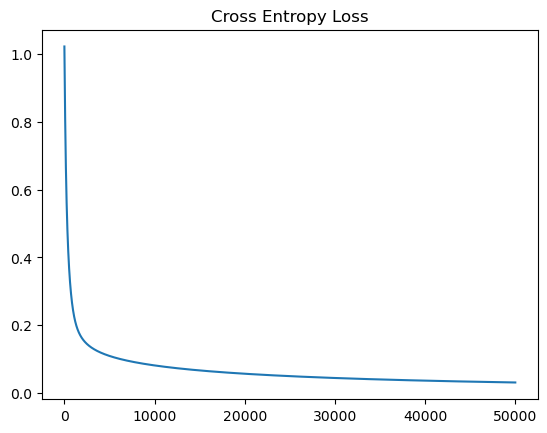

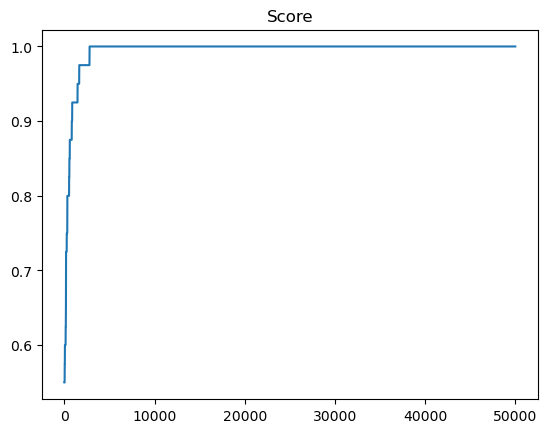

In [11]:
model.train()
model.plot()

In [6]:
x = np.random.randn(20, 5)
y = (np.sum(x, axis=1, keepdims=True)+0.5 > 0).astype(int)
y = np.concatenate([y, 1-y], axis=-1)

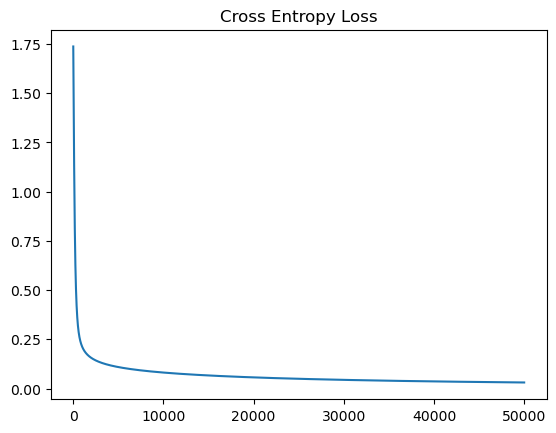

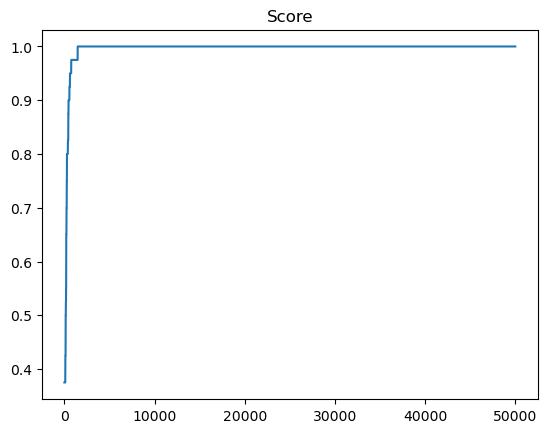

In [12]:
model.fit(x, y)
model.train()
model.plot()

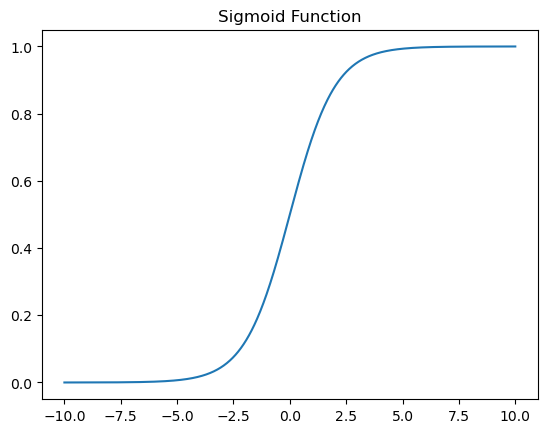

In [16]:
x = np.linspace(-10, 10, 1000)
y = model.sigmoid(x)
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.savefig("Figure_5.png")

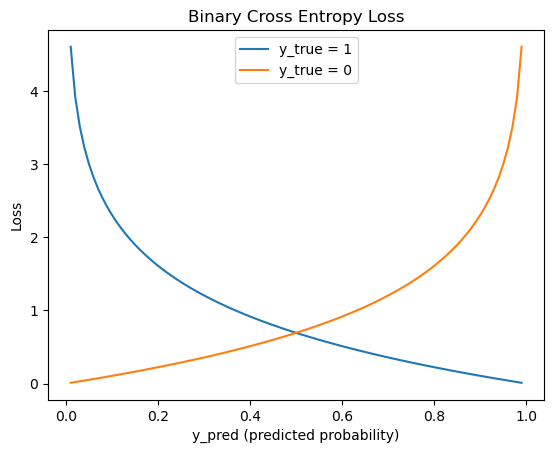

In [27]:
def binary_cross_entropy(y_true, y_pred):
    return -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

# values from 0 to 1 (with small offset to avoid log(0) )
y_pred = np.linspace(0.01, 0.99, 100)

# for y_true = 1
plt.plot(y_pred, binary_cross_entropy(1, y_pred), label='y_true = 1')

# for y_true = 0
plt.plot(y_pred, binary_cross_entropy(0, y_pred), label='y_true = 0')

plt.title('Binary Cross Entropy Loss')
plt.xlabel('y_pred (predicted probability)')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Figure_6.png")
plt.show()